In [36]:
from PIL import Image
import os,sys
import matplotlib.pyplot as plt
import numpy as np
import skimage
from pathlib import Path
from skimage.io import imread
from sklearn.utils import Bunch
from sklearn import svm,metrics,datasets
from sklearn.model_selection import GridSearchCV,train_test_split
import pickle

In [37]:
def load_image(path):
        image_dir=Path(path)
        folders=[directory for directory in image_dir.iterdir() if directory.is_dir()]
        categories=[fo.name for fo in folders]
        images=[]
        flat_data=[]
        target=[]
        for i,direc in enumerate(folders):
            for file in direc.iterdir():
                img=imread(file)
                flat_data.append(img.flatten())
                images.append(img)
                target.append(i)
        flat_data=np.array(flat_data)
        target=np.array(target)
        images=np.array(images)
        return Bunch(data=flat_data,target=target,target_names=categories)

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
image_dataset=load_image(r'/content/drive/MyDrive/mdenode_resized')

In [40]:
image_dataset.target_names

['naevus', 'melanoma', 'basal cell carcinoma']

In [41]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(image_dataset.data,image_dataset.target,test_size=0.1)

In [43]:
model=svm.SVC()
model.fit(x_train,y_train)
pickle.dump(model,open('./svm.pkl','wb'))
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score
svm_acc=accuracy_score(pred,y_test)
print(svm_acc*100)

70.58823529411765


In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
gnb = GaussianNB().fit(x_train, y_train)
pickle.dump(gnb,open('./naive_bayes.pkl','wb'))
gnb_predictions = gnb.predict(x_test)

In [47]:
nb_acc=accuracy_score(gnb_predictions,y_test)
print(nb_acc*100)

64.70588235294117


In [48]:
print(gnb_predictions)

[0 0 1 0 1 2 0 1 0 2 2 1 2 2 2 0 0]


In [49]:
print(y_test)

[2 0 2 0 0 2 0 2 0 2 2 1 0 0 2 0 0]


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf_acc=accuracy_score(pred,y_test)*100
print(rf_acc)

52.94117647058824


In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
dt_acc=accuracy_score(pred,y_test)*100
print(dt_acc)

47.05882352941176


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
knn_acc=accuracy_score(pred,y_test)*100
print(knn_acc)

52.94117647058824


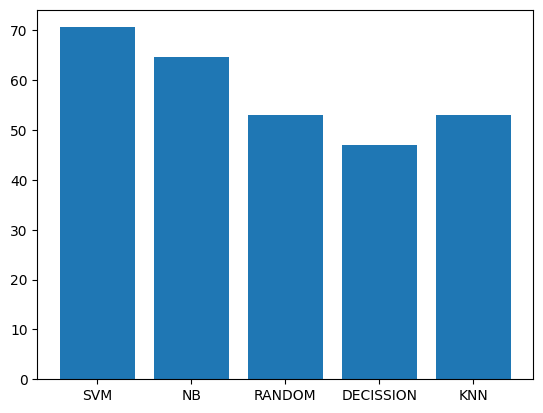

In [53]:
import matplotlib.pyplot as plt

x=[svm_acc*100, nb_acc*100, rf_acc,dt_acc,knn_acc]
y=["SVM","NB","RANDOM","DECISSION","KNN"]
plt.bar(y,x)
plt.show()

In [59]:
images = []
flat_data = []
path=r'/content/drive/MyDrive/'
file=os.listdir(r'/content/drive/MyDrive')
img = skimage.io.imread(path+str(file[0]))
flat_data.append(img.flatten())
images.append(img)
flat_data = np.array(flat_data)
images = np.array(images)
test_data=Bunch(data=flat_data,images=images)

ValueError: ignored